# Section 1 Probability, Statistics, and Uncertainty

Outline:
Introduce the concept of probability
Different probability distributions
Statistics are numbers
Uncertainty
Monte Carlo?

First, let's import some packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## 1.1 What is probability?

It is likely that you've come across probability in your daily life. The theory of probability entails the study of random events. While the origins of classical probability theory lie in studying games of chance, the study of randomness is now indispensible across all aspects of modern life.

It's now time to be a little formal. When we analyze probabilities, e.g., what will happen when we roll a fair n-sided die, we consider what's called an event space. Every possible outcome of our experiment, i.e. rolling the die, lives in this event space. Now, we can write down some rules.

1. The probability of an event happening must be a positive real number.

2. The probability of any event at all happening must be 1. 

3. The probability of a set of certain events happening is a sum of the probability of each individual event.

### 1.1.1 Working with Random Numbers

We can make this concrete by thinking about the case where we have a single six-sided die. Suppose we represent the total probability of rolling any number as a circle with area 1 (the second rule). Now, we know from geometry that areas can only be represented by positive real numbers (the first rule). We can then represent the probability of rolling the numbers 1 through 6 by dividing up the circle into 6 equal areas. Then, the probability of rolling, let's say, an even number can be found by adding the areas of the regions corresponding to rolling an even number (the third rule). 

In this setup, we can imagine that we can simulate rolling our die by generating a random point in the circle and seeing where it lands. For example, if we had drawn this circle in the sand, we could carefully balance a stick on its end and let it fall to generate a random number. Of course, with computers, there's always a way to do this efficiently with a few lines of code. For this, we'll use the `random` module of NumPy.

```
rng = np.random.default_rng(seed=42) # passing a seed is optional
rints = rng.integers(low=1, high=6, size=6, endpoint=True)
```

In the first line of the above code, we generate what's called a `Generator` instance that will generate the random numbers for us. When creating this instance, we pass an optional seed to the function `default_rng` in order to make sure that our results are exactly reproducible. At first, this might come as a surprise since we're trying to work with random data. Can you think of a reason why we'd want our random data to be reproducible?

### 1.1.2 Practice Problem 1: Dice Rolls

In the cell below, write a function that rolls a die with a number s sides N times. Your function should:
1. Produce a histogram that shows how many times each number came up. Use the kwarg `density=True' in order to normalize the results to 1. (For this, make sure the number of bins is equal to s.) 
2. Calculate the expected probability of rolling any given side and report the sides for which you get the largest discrepancies from this value.
3. Calculate the probability of rolling an even number vs an odd number. Compare this to the actual probabilities from the list of numbers you generate.

One of the other inputs should be an optional value for a seed. If a seed is not provided by the user, then do not pass a seed to the `default_rng` generator.

Choose a number s (not too big!) and repeat this experiment three times for five different values of N (so total 15 times). How large does N need to be for your results to start converging? 

### 1.1.3 Distributions

In the previous exercise, in order to generate data, you chose random integers in a list. Typically, this is known as *drawing samples from a distribution*. In this case, each individual number you generated is a sample and the distribution is the list of integers that you were choosing from (i.e., in the case of a six-sided die, the numbers from 1 to 6). As one might expect, there are many different kinds of distributions. The distribution you have been using is called a *discrete uniform distribution*. It is called discrete because the range of possible values are countable and finite, and uniform because each value has an equal probability of being chosen. 

As one might expect, there are many more distributions you could choose from. In particular, there are also continuous distributions, where the sample is chosen from a range of nonfinite values. One of the most common to use is the *continuous* uniform distribution, where the sample can take on the value of any real number** between two endpoints. If one were to plot this probability of being chosen, it would look like a straight line described by a function of the form

$p(x) = c, 0\leq x<1 $,

where $c$ is some constant whose value depends on the endpoints chosen. In practice, these endpoints are chosen to be 0 and 1 for the function supplied by standard libraries. Then, the user is responsible for transforming the output to the desired range. In the case of NumPy, 1000 samples from the uniform distribution from -4 to 2 can be generated with the following code:

```
rng = np.random.default_rng()
s = rng.uniform(low=-4, high=2, size=1000)
```
or with the following code:
```
rng = np.random.default_rng()
s = -4 + 6*rng.uniform(size=1000)
```
Do you understand how the second example works? Use algebra to figure out how to transform the distribution [0,1) to the distribution [low,high).

** Due to the limited memory of computers, this is not strictly true, but the approximation is close enough.

In the cell below, generate 1000 samples from uniform distributions with the following endpoints and plot them on a histogram to confirm that they appear uniform:
1. Between 100 and 200
2. Between 0 and $2\pi$

In each case, follow both the first and the second examples above. That is, generate samples twice. In the first case, call the NumPy function with the endpoints directly. In the second, transform the function by hand. Plot them both on the same histogram with the same bin number to ensure that they are similar.

### 1.1.4 Other Distributions

Besides the uniform distribution, there are many other continuous distributions that see wide use across STEM fields. NumPy has [a ton](https://numpy.org/doc/stable/reference/random/generator.html#distributions) of different distributions you can choose from. However, there are many more, so if you don't find what you are looking for, you might need to use a different library, such as [`scipy.stats`](https://docs.scipy.org/doc/scipy/reference/stats.html). Here, we will focus on the NumPy implementation.

In astronomy one distribution that often comes up is known as a power law, which is of the form

$ p(x) = A(x/x_0)^{-\alpha},\, x>x_0,\, \alpha>0 $

and A is a constant whose value depends on the values of the other two. In other fields, especially economics, this is known as a Pareto distribution. This comes up in many areas. This distribution can be used to describe, for example, the distribution of wealth, where 10% of people in a country control 90% of the wealth. We will not go over the details of this distribution here, but if you continue studying astronomy, you will certainly see it again in the future.

There is one distribution that's so important you've probably seen it already. The Gaussian, or normal distribution, is also known as the bell curve. It is defined by the following function:

$ p(x) = \frac{1}{\sigma\sqrt{2\pi}} e^{-\frac{1}{2}(\frac{x-\mu}{\sigma})^2},\,\sigma>0$

This distribution comes up everywhere in statistics in this form and related forms as a result of something called the Central Limit Theorem. Without getting into too many thorny mathematical details, we'll see why. But first, we need additional information.

## 1.2 Statistics

### 1.2.1 What is a Statistic?

A statistic is a quantity that is computed from a set of data. There are many different statistics. Many of them are already familiar to you. The most familiar to you is likely to be the mean of data, which is the sum of all the data divided by the total number of data points. In statistics, the mean is often denoted with the Greek letter $\mu$. This is the same $\mu$ in the equation above. The other parameter, $\sigma$, is the standard deviation of a distribution, which characterizes the spread of values around the mean. There are many others as well, such as the median, the mode, percentiles, etc.

### 1.2.2 Calculating Statistics in Python

Since these operations are extremely common, there are [functions to compute them](https://numpy.org/doc/stable/reference/routines.statistics.html) for a NumPy array. For example, to calculate the median and standard deviation of some array `a`, we can write the following code:
```
median = np.median(a)
std = np.std(a)
```

Armed with these functions, we can now return to our discussion of the Central Limit Theorem.

### 1.2.3 Practice Problem 2: The Central Limit Theorem

Instead of telling you the result up front, you will demonstrate it yourself. If you'd like an intuitive explanation of what is going on, math educator Grant Sanderson (3 Blue 1 Brown) has a wonderful [series of videos (starting with this one)](https://www.youtube.com/watch?v=zeJD6dqJ5lo) on this topic. Now, the problem.

1. What is the mean of the uniform distribution with endpoints 0 and 1?
2. Create a function that takes two inputs N and M and generates an array of size N by M sampled from a uniform distribution.
3. Sum the elements of this array along one axis so you're left with a 1d array of length N of sums of numbers. 
4. Take the mean and standard deviation of the resulting 1d array. What is the relationship between your answer to 1 and the mean that you compute? Does this relationship make sense?
5. Make a histogram of the 1d array with the kwarg `density=True`. Make sure to try to choose an appropriate number of bins.
6. On the same plot as the histogram, plot the equation for the normal distribution above using the values you computed for the mean and standard deviation as the $\mu$ and $\sigma$. To generate the x values for the distribution, use the minimum and maximum values of your array of sums.

M can take on any value but for anything exciting to happen M should be at least 3 or 4, so try M=1,2,3,5,10. If everything has gone well, you should see something magical happen as you increase M. On the other hand, in order to get good statistics you need large values of N, so use N=10000.

In [21]:
def sum_uniform(N,M):
    rng = np.random.default_rng()
    s = rng.uniform(size=(N,M))
    sums = np.sum(s, axis=1)
    mu = np.mean(sums)
    sig = np.std(sums)

    xs = np.linspace(np.min(sums),np.max(sums))
    normal = np.exp(-0.5*((xs-mu)/sig)**2)/(sig*np.sqrt(2*np.pi))

    plt.hist(sums, bins=int(np.sqrt(N)), density=True)
    plt.plot(xs, normal)
    return

What we saw here is that by adding together a bunch of samples from the uniform distribution many times, we were able to produce a Gaussian distribution. We can even say that sums of the uniform distribution converged quickly to a Gaussian, because we only need small values of M to get to one. What's interesting is that this magical behavior doesn't only happen from summing the uniform distribution. In the cell below, create another function and repeat the exercise above. The only difference from the function above is that we will replace the uniform distribution with an exponential distribution, so instead of 
```
s = rng.uniform(size=(N,M))
```
use
```
s = rng.exponential(size=(N,M))
```
What you should find is that while the same behavior occurs, you'll need to increase M to much larger values.

In [22]:
def sum_expon(N,M):
    rng = np.random.default_rng()
    s = rng.exponential(size=(N,M))
    sums = np.sum(s, axis=1)
    mu = np.mean(sums)
    sig = np.std(sums)

    xs = np.linspace(np.min(sums),np.max(sums))
    normal = np.exp(-0.5*((xs-mu)/sig)**2)/(sig*np.sqrt(2*np.pi))

    plt.hist(sums, bins=int(0.5*np.sqrt(N)), density=True)
    plt.plot(xs, normal)
    return

It's as a result of this behavior that the Gaussian is so prominent in statistics and science. Because many phenomena can be understood as the result of many different independent random processes, many distributions in nature can be very well approximated as a Gaussian. This includes instrumental noise, measurement uncertainty, etc. As a result, many statistical tests and techniques that you will go on to learn about will assume that what you're modeling has some sort of Gaussian behavior. For example, the rule that 68% of samples lie within 1 standard deviation of the mean assumes that these samples are normally distributed.

### 1.2.4 Linear Regression

At the beginning of the section, a statistic was defined as a quantity computed from a set of data. Thus far, we have only been examining statistics of 1-dimensional datasets. However, we could talk about higher-dimensional data as well. Since paper and computer screens are 2-dimensional, most plots are also 2-dimensional, so we'll restrict ourselves to data that has x and y values. Consider the formula

$y = mx + b + N(x;\sigma)$

If you're like me, you're both familiar and sick of the first part of this. It's the equation for a straight line! However, since the real world is usually quite messy, we're adding on a Gaussian error term with some standard deviation $\sigma$. You can sample from a Gaussian/normal distribution with mean `mu` and standard deviation `sigma` as follows
```
s = rng.normal(loc=mu, scale=sigma, size=(M,N))
```
Note that leaving out either `loc` or `sigma` will cause them to use the default values of 0 and 1, respectively. A Gaussian distribution with these values is typically referred to as the standard normal distribution. 

To start, let's generate some fake data with noise. Create a range of x values between 0 and 10. Use those x values to generate three sets of y values using the above equation for a slope of $m=0.5$ and a y-intercept of $b=1$. For the noise terms, use three different values of `sigma=0.1, 1, 10`.

Now that we've generated some fake data, let's see if we can recover the original slope and y-intercept. We'll use the [linregress](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html) function from SciPy. Later, you'll learn more about SciPy. In order to use this function, first we'll need to import it from the package.
```
from scipy.stats import linregress
```
Now, in order to use this function, all you need to do is give it the x and y data.
```
result = linregress(x, y)
```
As you can find in the documentation, the returned object is not a native Python datastructure. Instead it's an instance of a structure called `LinregressResult` which contains the results we want in various attributes. For example, we can retrieve the slope with `result.slope`. The three attributes we'll be concerned with here are `result.slope`, `result.intercept`, and `result.rvalue`. The last one is the [Pearson correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient), which measures the correlation between two sets of data. If you square this number, you get the [coefficient of determination](https://en.wikipedia.org/wiki/Coefficient_of_determination), $R^2$, which measures how much of the change in the dependent variable (y) is due to the change in the independent variable (x).

Now, the problem:
1. Using the three sets of y data generated above, use `linregress` to recover the slope and y-intercept.
2. Plot each set of data on a separate plot. 
3. Include both the original line $y=m_{\rm true} x + b_{\rm true}$ and the result from the regression $y=m_{\rm fit} x + b_{\rm fit}$ for each dataset.
4. Label the dataset and the two lines appropriately and create a legend.

### 1.2.5 Practice Problem 3: Anscombe's Quartet and the Misuse of Statistics

This problem will teach you how statistical quantities can lead you astray.

1. Load the files `anscombe_{i}.txt` into four separate arrays. Each file contains one column of x data and one column of y data.
2. For each dataset, compute and print out the following quantities
    a. Mean and standard deviation of the x column
    b. Mean and standard deviation of the y column
3. For each dataset, use `linregress` to compute the slope, intercept, correlation coefficient, and $R^2$ for the x and y values.
4. What do you notice about the values of these different quantities across the datasets?
5. Now, plot each dataset as a scatter plot in four separate plots. Hopefully, you'll see why data visualization is so important.

In [ ]:
# Running in Google Colab? Run this cell to download the file for this problem
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_4/data/anscombe_1.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_4/data/anscombe_2.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_4/data/anscombe_3.txt
!wget https://raw.githubusercontent.com/CIERA-Northwestern/REACHpy/main/Module_4/data/anscombe_4.txt

# If you're not running in Colab, this file should be in the data directory.
# Change the loading path of the file to include 'data/' when the file is loaded

## 1.3 Monte Carlo Methods

### 1.3.1 What is a Monte Carlo Method?

[Wikipedia](https://en.wikipedia.org/wiki/Monte_Carlo_method) has a pretty good definition:
> Monte Carlo methods, or Monte Carlo experiments, are a broad class of computational algorithms that rely on repeated random sampling to obtain numerical results. The underlying concept is to use randomness to solve problems that might be deterministic in principle. They are often used in physical and mathematical problems and are most useful when it is difficult or impossible to use other approaches. Monte Carlo methods are mainly used in three problem classes: optimization, numerical integration, and generating draws from a probability distribution.

In the above sections, you already dealt with drawing random numbers from a distribution. Since Monte Carlo can basically mean anything in practice, we'll jump directly into the problems.

#### 1.3.2 Practice Problem 4: Calculating $\pi$

Due to its relative simplicity, this is the canonical example of Monte Carlo integration, which is when you use random sampling to find the area bounded by a curve. However, this is an extremely inefficient method of calculating $\pi$, as you will see.

Write a function with input N, corresponding to the number of points you'll generate. Try to make sure this function is vectorized (i.e. don't use for loops) or else it might take a very long time to run.
1. Generate N pairs of random numbers between 0 and 1 from a uniform distribution. Each pair corresponds to a 
2. Count the number of points that have a distance from the origin less than or equal to 1.
3. Take the ratio of the number of points you counted in step (2) to the total number of points. Multiply this number by 4 and return it.

How big does N have to be for you to get $\pi$ correct to 4 decimal places? 

Make a plot of the error in your estimate as a function of N. Use [`np.geomspace()`](https://numpy.org/doc/stable/reference/generated/numpy.geomspace.html) to generate your range of N values. The error can be written as

$\Delta = \frac{|\pi - \pi_{\rm estimate}|}{\pi}$

In [6]:
def approx_pi(N):
    rng = np.random.default_rng()
    pts = rng.uniform(size=(N,2))
    rs = np.sqrt(pts[:,0]**2 + pts[:,1]**2)
    idx = np.argwhere(rs<1)
    return 4*len(idx)/N

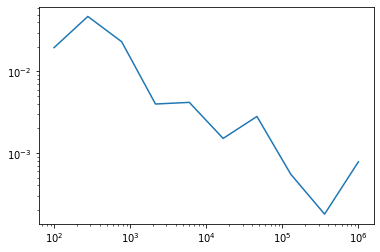

In [20]:
length = 10
Ns = np.geomspace(100, 1e6, num=length).astype(int)
estimate = np.zeros(length)
for i in range(length):
    estimate[i] = approx_pi(Ns[i])

plt.plot(Ns, np.abs(estimate-np.pi)/np.pi)
plt.yscale('log')
plt.xscale('log')

### 1.3.3 Practice Problem 5: Photons Escaping from the Sun

We'll look at an example of a random walk. The radius of the Sun is about 696,000 kilometers. If a photon goes in a straight line from the center of the Sun, you would find that it would take about 2 seconds for the photon to reach the surface and escape into space. However, the reality is much more complicated than that. On its way to the surface, it will run into a bunch of atoms. In real life, the distance a photon can travel between these "scattering" events can be between a tenth and a couple centimeters. As a result, it can take hundreds of thousands to millions of years for a photon to go from the core to the surface, at which point it will escape into space.

In real life, photons travel in 3 dimensions, but we'll instead look at a 2 dimensional version of the problem. We'll also change some of the numbers. Doing this calculation with realistic numbers will take a long time with Python.

Write a function that takes a single argument `lambda`, which is the ratio between the mean distance traveled between scattering events and the radius of the Sun.

There are two ways you could do this, the easy but slow way using `while` loops and the hard but fast way using vectorized numpy operations. Here I'll outline the version using a `while` loop and leave the other method as a challenge.
1. Before the while loop, initialize the random number generator instance, radius vector $(0,0)$, and a counter to keep track of the number of steps.
2. In the while loop, generate a random number between 0 and $2\pi$ from a uniform distribution.
3. Using that value of $\theta$, generate the vector $\delta r = \lambda (\cos\theta,\sin\theta)$ and add that vector to the total radius vector.
4. If the magnitude of the total vector is greater than 1, the `while` loop should end.
5. Return how many steps it took for the photon to escape.
6. Optionally, add a keyword argument for the maximum allowed number of iterations. If the number of steps exceeds this number, return `None`.

Run this function 1000 times with `lambda=0.01`. If you added the optional kwarg, then use `max_iter=300000`. Make a histogram of your results.

In [2]:
def random_walk_vectorized(pathlength=1e-2):
    rng = np.random.default_rng()
    theta = 2*np.pi*rng.uniform(size=100000)
    r = pathlength*np.array((np.cos(theta),np.sin(theta)))
    r_cumulative = np.cumsum(r, axis=1)
    d = np.sqrt(r_cumulative[0,:]**2 + r_cumulative[1,:]**2)
    idx = np.argwhere(d>1)
    return idx[0]

def random_walk_naive(pathlength=1e-2):
    r = np.zeros(2)
    rng = np.random.default_rng()
    counter = 0
    d = 0
    while d < 1:
        theta = 2*np.pi*rng.uniform()
        r += pathlength*np.array((np.cos(theta),np.sin(theta)))
        d = np.sqrt(r[0]**2 + r[1]**2)
        counter += 1
    return counter

(array([ 58., 120., 136., 141.,  93.,  95.,  67.,  61.,  47.,  35.,  23.,
         30.,  17.,   9.,   9.,   9.,  14.,   9.,   8.,   4.,   3.,   3.,
          2.,   2.,   3.,   0.,   1.,   0.,   0.,   1.]),
 array([ 1153. ,  2698.3,  4243.6,  5788.9,  7334.2,  8879.5, 10424.8,
        11970.1, 13515.4, 15060.7, 16606. , 18151.3, 19696.6, 21241.9,
        22787.2, 24332.5, 25877.8, 27423.1, 28968.4, 30513.7, 32059. ,
        33604.3, 35149.6, 36694.9, 38240.2, 39785.5, 41330.8, 42876.1,
        44421.4, 45966.7, 47512. ]),
 <BarContainer object of 30 artists>)

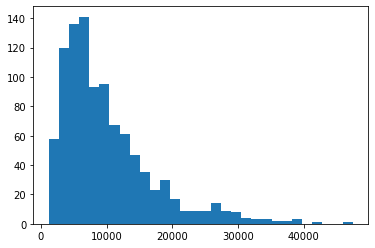

In [3]:
length = 1000
Ns = np.zeros(shape=length)

for i in range(length):
    Ns[i] = random_walk_vectorized()

plt.hist(Ns, bins=30)